# Predictive Analysis

# Computer Vision in Healthcare- Medical image Analysis    

Members:                    PRN NO              Roll No

Piyush Gunde                220200080            306

Shivlila Vishawkarma        0120190              309

Vaishnavi Gaikwad           0120190236           320

Vansh Gaikwad               0120190              312

Kshitij Patil               0120190360           316


About Dataset:
ID, Diagnosis, radiius_mean, texture_mean,perimeter_mean....
attribute = 30
columns = 570

It is binary-classification because output will be  in form of 0,1.


# Import modules and dataset

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("data.csv")

#  Data Cleaning and Analysis

In [3]:
print(df.describe().T)

                         count          mean           std          min  \
id                       569.0  3.037183e+07  1.250206e+08  8670.000000   
radius_mean              569.0  1.412729e+01  3.524049e+00     6.981000   
texture_mean             569.0  1.928965e+01  4.301036e+00     9.710000   
perimeter_mean           569.0  9.196903e+01  2.429898e+01    43.790000   
area_mean                569.0  6.548891e+02  3.519141e+02   143.500000   
smoothness_mean          569.0  9.636028e-02  1.406413e-02     0.052630   
compactness_mean         569.0  1.043410e-01  5.281276e-02     0.019380   
concavity_mean           569.0  8.879932e-02  7.971981e-02     0.000000   
concave points_mean      569.0  4.891915e-02  3.880284e-02     0.000000   
symmetry_mean            569.0  1.811619e-01  2.741428e-02     0.106000   
fractal_dimension_mean   569.0  6.279761e-02  7.060363e-03     0.049960   
radius_se                569.0  4.051721e-01  2.773127e-01     0.111500   
texture_se               

In [4]:
print(df.isnull().sum())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

No missing data

In [5]:
#Rename Datsset to label to make it easy to understand
df = df.rename(columns = {'diagnosis':'Label'})
print(df.dtypes)

id                           int64
Label                       object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

<AxesSubplot:xlabel='Label', ylabel='count'>

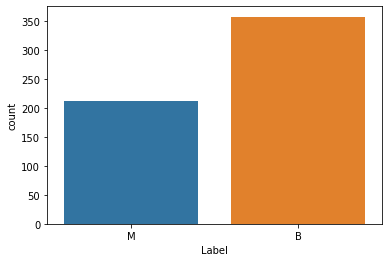

In [8]:
#Understand The data
sns.countplot(x='Label', data = df) #M = malignant B=benign

# Replace categorical value with numbers


In [9]:
print('Distribution of data: ',df['Label'].value_counts())

Distribution of data:  B    357
M    212
Name: Label, dtype: int64


In [10]:
#Define the dependent variable that needs to be predicted (labels)
y = df['Label'].values
print("Labels before encoding are: ",np.unique(y))

Labels before encoding are:  ['B' 'M']


In [11]:
#Encoding categorical data from text(B and M) to integers(0 and 1)
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Y = labelencoder.fit_transform(y) #M=1 and B=0
print("Labels after encoding are: ",np.unique(Y))

Labels after encoding are:  [0 1]


In [12]:
# define x and normalize/ scale values

# define the independent variables . Drop label and ID, and  normalize other data
X = df.drop(labels = ['Label','id','Unnamed: 32'],axis = 1)
print(X.describe().T) #Needs scaling

                         count        mean         std         min  \
radius_mean              569.0   14.127292    3.524049    6.981000   
texture_mean             569.0   19.289649    4.301036    9.710000   
perimeter_mean           569.0   91.969033   24.298981   43.790000   
area_mean                569.0  654.889104  351.914129  143.500000   
smoothness_mean          569.0    0.096360    0.014064    0.052630   
compactness_mean         569.0    0.104341    0.052813    0.019380   
concavity_mean           569.0    0.088799    0.079720    0.000000   
concave points_mean      569.0    0.048919    0.038803    0.000000   
symmetry_mean            569.0    0.181162    0.027414    0.106000   
fractal_dimension_mean   569.0    0.062798    0.007060    0.049960   
radius_se                569.0    0.405172    0.277313    0.111500   
texture_se               569.0    1.216853    0.551648    0.360200   
perimeter_se             569.0    2.866059    2.021855    0.757000   
area_se             

In [13]:
# for bringing in same range [0-1]

#Scale/ normalize the values to bring thmn to similar range
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
print(X)  #scaled value

[[0.52103744 0.0226581  0.54598853 ... 0.91202749 0.59846245 0.41886396]
 [0.64314449 0.27257355 0.61578329 ... 0.63917526 0.23358959 0.22287813]
 [0.60149557 0.3902604  0.59574321 ... 0.83505155 0.40370589 0.21343303]
 ...
 [0.45525108 0.62123774 0.44578813 ... 0.48728522 0.12872068 0.1519087 ]
 [0.64456434 0.66351031 0.66553797 ... 0.91065292 0.49714173 0.45231536]
 [0.03686876 0.50152181 0.02853984 ... 0.         0.25744136 0.10068215]]


# Split train and test dataset

In [14]:
#split data into train and test to verify accuracy after fitting the model.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25,random_state=42)
print("Shape of training data is: ", X_train.shape)
print("Shape of testing data is: ",X_test.shape)

Shape of training data is:  (426, 30)
Shape of testing data is:  (143, 30)


# Implementation of deep learning


In [15]:
from keras.models import Sequential 
from keras.layers import Dense, Activation, Dropout #layers

In [16]:
model = Sequential() #makes easy to add layers
model.add(Dense(16,input_dim = 30, activation = 'relu'))#Dense = 16 unit;input_dimension = 30; activation=relu

# No. of weights = 16 unitsn* 30inputs = 480
#number of biases = 16(total units in hidden layer)
#Total parameters = 480+16=496

model.add(Dropout(0.2))# to prevent overfitting
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss = 'binary_crossentropy',optimizer = 'adam', metrics =['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                496       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________
None


In [21]:
# fit with no early stopping or other callbacks
#verbose = 1-> display the output
#epochs -> part of data
#batch_size - >64 data size at time
#validation_data = check accuracy
history = model.fit(X_train,y_train,verbose = 1,epochs = 100, batch_size = 64,validation_data = (X_test,y_test))

Epoch 1/100
7/7 [==============================] - 1s 68ms/step - loss: 0.7544 - accuracy: 0.3709 - val_loss: 0.7429 - val_accuracy: 0.3497
Epoch 2/100
7/7 [==============================] - 0s 12ms/step - loss: 0.7341 - accuracy: 0.3709 - val_loss: 0.7216 - val_accuracy: 0.4056
Epoch 3/100
7/7 [==============================] - 0s 14ms/step - loss: 0.7133 - accuracy: 0.4554 - val_loss: 0.7024 - val_accuracy: 0.4615
Epoch 4/100
7/7 [==============================] - 0s 15ms/step - loss: 0.6994 - accuracy: 0.5070 - val_loss: 0.6846 - val_accuracy: 0.5524
Epoch 5/100
7/7 [==============================] - 0s 13ms/step - loss: 0.6855 - accuracy: 0.5258 - val_loss: 0.6678 - val_accuracy: 0.6923
Epoch 6/100
7/7 [==============================] - 0s 12ms/step - loss: 0.6714 - accuracy: 0.5939 - val_loss: 0.6516 - val_accuracy: 0.7692
Epoch 7/100
7/7 [==============================] - 0s 15ms/step - loss: 0.6553 - accuracy: 0.6901 - val_loss: 0.6366 - val_accuracy: 0.8392
Epoch 8/100
7/7 [===

# Result and Implementation

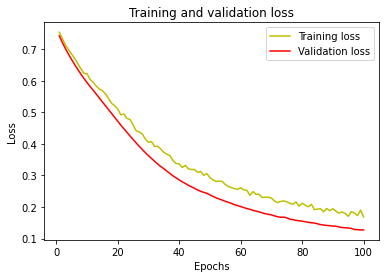

In [22]:
# plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+ 1)
plt.plot(epochs,loss,'y',label = 'Training loss')
plt.plot(epochs,val_loss,'r',label = "Validation loss")
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

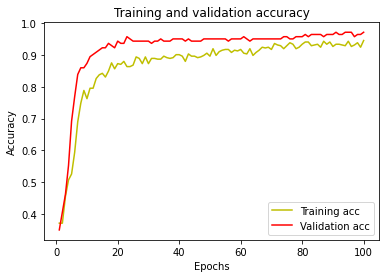

In [23]:
# use accuracy if acc doesn't work
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs,acc,'y',label = 'Training acc')
plt.plot(epochs,val_acc,'r',label = "Validation acc")
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

<AxesSubplot:>

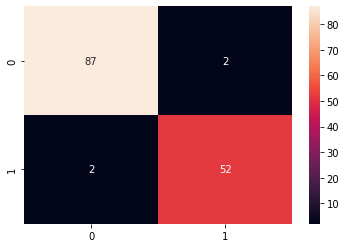

In [24]:
#Prediction the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)


# Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

sns.heatmap(cm,annot = True)

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        89
           1       0.96      0.96      0.96        54

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [26]:
#from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.972027972027972